# Pré - Processamento dos dados

Essa parte do trabalho tem o intuito de fazer as inputações e as codificações se necessário nas variáveis do conjunto de dados.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Decomposicao de Séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtra os warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
dados = pd.read_csv(r"C:\Users\eduar\OneDrive\Documentos\SandoBox\Projetos\PriceCast\Dataset\dados_2.csv",  index_col=0)

In [44]:
dados.head()

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,ano,mes,cluster,importacao%_oferta_total
0,2007-01-01,1629.549,51.486829,37.232129,1643.803700,188.496928,8.720586,NaN,NaN,NaN,1.422492,0.450872,2007,1,0,3.132176
1,2007-02-01,1405.073,44.565910,39.461382,1410.177528,188.657245,7.474812,NaN,NaN,NaN,1.412007,0.480057,2007,2,0,3.160305
2,2007-03-01,1444.693,23.326896,40.938828,1427.081068,188.817561,7.557989,NaN,NaN,NaN,1.427207,0.500857,2007,3,0,1.634588
3,2007-04-01,1333.077,19.810018,33.958065,1318.928953,188.977878,6.979277,NaN,NaN,NaN,1.471410,0.544433,2007,4,0,1.501978
4,2007-05-01,1359.253,16.034976,45.073625,1330.214351,189.138194,7.033029,NaN,NaN,NaN,1.613760,0.586239,2007,5,0,1.205443


In [45]:
dados.describe()

,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,ano,mes,cluster,importacao%_oferta_total
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,151.000000,151.000000,123.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1942.362714,101.913608,15.641445,2028.634876,203.074184,9.967207,0.100795,209342.013245,2.983468,3.079353,1.372507,2016.035176,6.341709,0.045226,4.878836
std,218.224087,52.108489,13.130883,253.835012,6.937968,1.028329,0.026776,58634.263987,0.977953,1.070493,0.715104,5.012486,3.441256,0.208324,2.218851
min,1324.948000,10.397096,2.414308,1306.775293,188.496928,6.903252,0.061000,121994.000000,1.568627,1.412007,0.450872,2007.000000,1.000000,0.000000,0.795630
25%,1806.174500,65.146414,6.815526,1905.126391,197.355618,9.391062,0.075500,165340.500000,2.212206,2.295236,0.805534,2012.000000,3.000000,0.000000,3.287490
50%,1968.960000,88.943141,10.012293,2058.156182,204.095197,10.078030,0.098000,199684.000000,2.753372,2.845443,1.084300,2016.000000,6.000000,0.000000,4.516282
75%,2109.306000,140.481139,19.230320,2211.973148,209.438692,10.720171,0.123500,240390.000000,3.625478,3.700026,1.986300,2020.000000,9.000000,0.000000,6.477124
max,2348.481000,244.038934,56.434593,2517.040863,212.932620,12.003825,0.149000,351063.000000,6.447781,6.349700,3.570700,2024.000000,12.000000,1.000000,10.550568


In [46]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 215
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      199 non-null    object 
 1   producao_leite            199 non-null    float64
 2   importacoes               199 non-null    float64
 3   exportacoes               199 non-null    float64
 4   oferta_total              199 non-null    float64
 5   populacao_pessoas         199 non-null    float64
 6   oferta_per_capita         199 non-null    float64
 7   taxa_desemprego           151 non-null    float64
 8   massa_salarial            151 non-null    float64
 9   leite_uht_industria       123 non-null    float64
 10  leite_uht_supermercado    199 non-null    float64
 11  preco_leite_produtor      199 non-null    float64
 12  ano                       199 non-null    int64  
 13  mes                       199 non-null    int64  
 14  cluster        

In [47]:
taxa_nulos = dados.isnull().sum()/len(dados)
taxa_nulos

data                        0.000000
producao_leite              0.000000
importacoes                 0.000000
exportacoes                 0.000000
oferta_total                0.000000
populacao_pessoas           0.000000
oferta_per_capita           0.000000
taxa_desemprego             0.241206
massa_salarial              0.241206
leite_uht_industria         0.381910
leite_uht_supermercado      0.000000
preco_leite_produtor        0.000000
ano                         0.000000
mes                         0.000000
cluster                     0.000000
importacao%_oferta_total    0.000000
dtype: float64

Apenas 3 variáveis com valores nulos.

- Taxa Desemprego com 24%
- Massa salarial com 24%
- Leite Industria com 38% dos valores nulos.

In [48]:
# Remocao de duas variaveis que nao seram mais usadas
dados = dados.drop(columns= ['ano', 'mes', 'cluster'], axis = 1)

In [49]:
dados.describe()

,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,importacao%_oferta_total
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,151.000000,151.000000,123.000000,199.000000,199.000000,199.000000
mean,1942.362714,101.913608,15.641445,2028.634876,203.074184,9.967207,0.100795,209342.013245,2.983468,3.079353,1.372507,4.878836
std,218.224087,52.108489,13.130883,253.835012,6.937968,1.028329,0.026776,58634.263987,0.977953,1.070493,0.715104,2.218851
min,1324.948000,10.397096,2.414308,1306.775293,188.496928,6.903252,0.061000,121994.000000,1.568627,1.412007,0.450872,0.795630
25%,1806.174500,65.146414,6.815526,1905.126391,197.355618,9.391062,0.075500,165340.500000,2.212206,2.295236,0.805534,3.287490
50%,1968.960000,88.943141,10.012293,2058.156182,204.095197,10.078030,0.098000,199684.000000,2.753372,2.845443,1.084300,4.516282
75%,2109.306000,140.481139,19.230320,2211.973148,209.438692,10.720171,0.123500,240390.000000,3.625478,3.700026,1.986300,6.477124
max,2348.481000,244.038934,56.434593,2517.040863,212.932620,12.003825,0.149000,351063.000000,6.447781,6.349700,3.570700,10.550568


Com base na análise feita acima, será feita a imputacao nos dados utilizando a média

In [50]:
dados['taxa_desemprego'] = dados['taxa_desemprego'].fillna(dados['taxa_desemprego'].mean())
dados['massa_salarial'] = dados['massa_salarial'].fillna(dados['massa_salarial'].mean())
dados['leite_uht_industria'] = dados['leite_uht_industria'].fillna(dados['leite_uht_industria'].mean())

In [51]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 215
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      199 non-null    object 
 1   producao_leite            199 non-null    float64
 2   importacoes               199 non-null    float64
 3   exportacoes               199 non-null    float64
 4   oferta_total              199 non-null    float64
 5   populacao_pessoas         199 non-null    float64
 6   oferta_per_capita         199 non-null    float64
 7   taxa_desemprego           199 non-null    float64
 8   massa_salarial            199 non-null    float64
 9   leite_uht_industria       199 non-null    float64
 10  leite_uht_supermercado    199 non-null    float64
 11  preco_leite_produtor      199 non-null    float64
 12  importacao%_oferta_total  199 non-null    float64
dtypes: float64(12), object(1)
memory usage: 21.8+ KB


In [52]:
# Criando a matriz de correlação
matriz_correlacao = dados.corr(numeric_only=True)
matriz_correlacao

,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,importacao%_oferta_total
producao_leite,1.000000,0.488952,-0.390349,0.980276,0.739708,0.969506,0.050184,0.182126,-0.052836,0.512384,0.484832,0.352446
importacoes,0.488952,1.000000,-0.413323,0.647022,0.585749,0.602984,-0.113466,0.443983,0.337117,0.675431,0.569065,0.981842
exportacoes,-0.390349,-0.413323,1.000000,-0.472166,-0.542681,-0.409517,-0.149205,-0.277811,-0.241854,-0.440938,-0.440798,-0.387539
oferta_total,0.980276,0.647022,-0.472166,1.000000,0.784251,0.978461,0.027569,0.262089,0.036293,0.601967,0.556437,0.524605
populacao_pessoas,0.739708,0.585749,-0.542681,0.784251,1.000000,0.641312,0.174735,0.537539,0.314843,0.857255,0.868204,0.497453
oferta_per_capita,0.969506,0.602984,-0.409517,0.978461,0.641312,1.000000,-0.024097,0.132170,-0.063090,0.458381,0.397786,0.483616
taxa_desemprego,0.050184,-0.113466,-0.149205,0.027569,0.174735,-0.024097,1.000000,-0.040053,-0.281518,-0.078712,0.039302,-0.121577
massa_salarial,0.182126,0.443983,-0.277811,0.262089,0.537539,0.132170,-0.040053,1.000000,0.618258,0.678336,0.709501,0.394627
leite_uht_industria,-0.052836,0.337117,-0.241854,0.036293,0.314843,-0.063090,-0.281518,0.618258,1.000000,0.673055,0.698846,0.339946
leite_uht_supermercado,0.512384,0.675431,-0.440938,0.601967,0.857255,0.458381,-0.078712,0.678336,0.673055,1.000000,0.965457,0.613481


### Seleção de variáveis com RFECV (Recursive Feature Elimination with Cross Validation)

O objetivo dessa técnica, é identificar as variáveis que mais contribuem para performance do modelo, reduzindo a complexidade e aumentando a interpretabilidade do modelo. Ela combina duas abordagens:

- Eliminação recursiva
Avalia a importância de cada variável e elimina iterativamente as menos relevantas. A cada etapa, o modelo é re-treinado com o subconjunto restante.

- Validação Cruzada (Cross - Validation)
Durante o processo de eliminação, a RFECV avalia a performance do modelo com validação cruzada, garantindo uma escolha mais robusta das variáveis.

In [53]:
X = dados.drop(columns = ['preco_leite_produtor', 'data'], axis = 1)
y = dados['preco_leite_produtor']

In [54]:
# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

O modelo que será utilizado para essa técnica, será a implementação otimizada do algoritmo Gradient Boosting, que cria uma sequência de árvores de decisão onde cada árvore tenta corrigir os erros das árvores anteriores.

In [55]:
# Inicializar o modelo XGBoost
modelo = XGBRegressor(random_state=42)

In [56]:
# Inicializar RFECV com validação cruzada
rfecv = RFECV(estimator= modelo, step = 1, cv = KFold(5, shuffle=True, random_state= 42), scoring= 'r2')

# AJustar o RFECV
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, gamma=None, grow_policy=None,
                             importance_type=None, interaction_constraints=None,
                             learning_rate=None, max_bin=None,
                             max_cat_threshold=None, max_cat_to_onehot=None,
                             max_delta_step=None, max_depth=None,
                             max_leaves=None, min_child_weight=None,
                             missing=nan, monotone_constraints=None,
                             multi_strategy=None, n_estimators=None,
                             n_jobs=None, num_parallel_tree=None,
                             random_state=42, ...),
      scoring='r2')

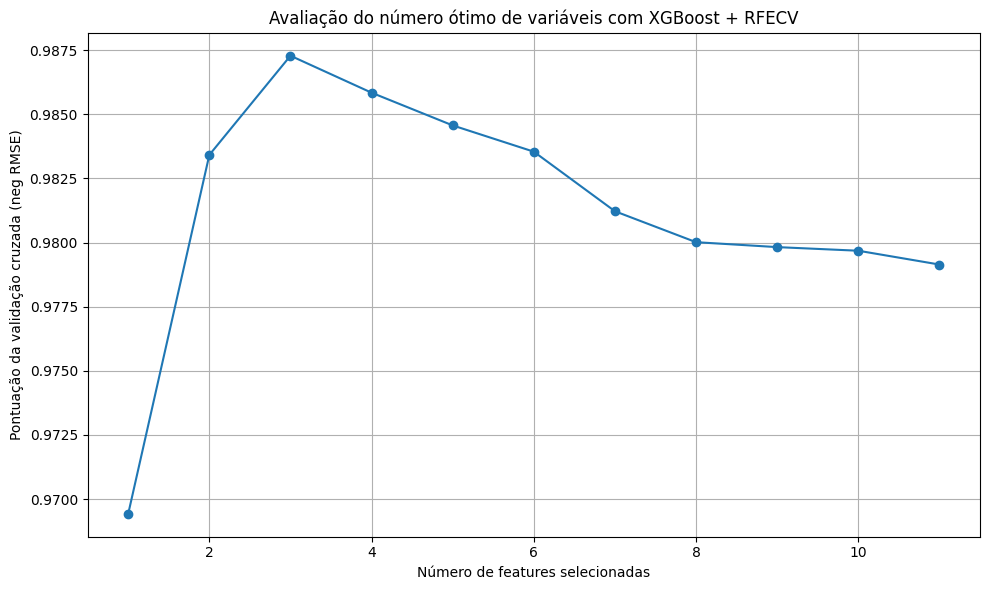

Número ótimo de features: 3
Features selecionadas: ['populacao_pessoas', 'leite_uht_industria', 'leite_uht_supermercado']


In [57]:
# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.xlabel("Número de features selecionadas")
plt.ylabel("Pontuação da validação cruzada (neg RMSE)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.title("Avaliação do número ótimo de variáveis com XGBoost + RFECV")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Número ótimo de features:", rfecv.n_features_)
print("Features selecionadas:", list(X.columns[rfecv.support_]))

In [58]:
# Visualizando a correlação
matriz_corr = dados[['data', 'populacao_pessoas', 'leite_uht_industria', 'leite_uht_supermercado', 'preco_leite_produtor']].select_dtypes(include='number').corr()
matriz_corr

,populacao_pessoas,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor
populacao_pessoas,1.000000,0.314843,0.857255,0.868204
leite_uht_industria,0.314843,1.000000,0.673055,0.698846
leite_uht_supermercado,0.857255,0.673055,1.000000,0.965457
preco_leite_produtor,0.868204,0.698846,0.965457,1.000000


Com o resultado acima, iremos seguir com apenas essas 3 variáveis selecionas.

In [59]:
dados_selecionados = dados[['data', 'populacao_pessoas', 'leite_uht_industria', 'leite_uht_supermercado', 'preco_leite_produtor']]

In [60]:
dados_selecionados.head(3)

,data,populacao_pessoas,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor
0,2007-01-01,188.496928,2.983468,1.422492,0.450872
1,2007-02-01,188.657245,2.983468,1.412007,0.480057
2,2007-03-01,188.817561,2.983468,1.427207,0.500857


In [61]:
# Colocando a coluna data como index
dados_selecionados.set_index('data', inplace= True)
dados_selecionados.head(3)

,populacao_pessoas,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor
data,,,,
2007-01-01,188.496928,2.983468,1.422492,0.450872
2007-02-01,188.657245,2.983468,1.412007,0.480057
2007-03-01,188.817561,2.983468,1.427207,0.500857


In [62]:
dados_certos = dados_selecionados[['leite_uht_industria', 'leite_uht_supermercado', 'preco_leite_produtor']]
dados_certos.to_csv(r'C:\Users\eduar\OneDrive\Documentos\SandoBox\Projetos\PriceCast\Dataset\dados_certos.csv')

### Processamento de Séries Temporais

Com base no problema que queremos resolver, temos duas possibilidades de modelos para serem utilizadas, o modelo SARIMAX e o ARIMAX. Ambos os modelos podem ser usados para projeção de valores para o futuro com base nos dados históricos. A principal diferença entre esses 2 modelos é que o SARIMAX possui uma componente de sazonalidade, ou seja, se as variáveis tiverem sazonalidade o modelo a ser usado será o SARIMAX caso não, será utilizado o ARIMAX. Agora iremos descobrir se as variáveis que vamos utilizar para fazer a projeção, possui ou não sazonalidade.

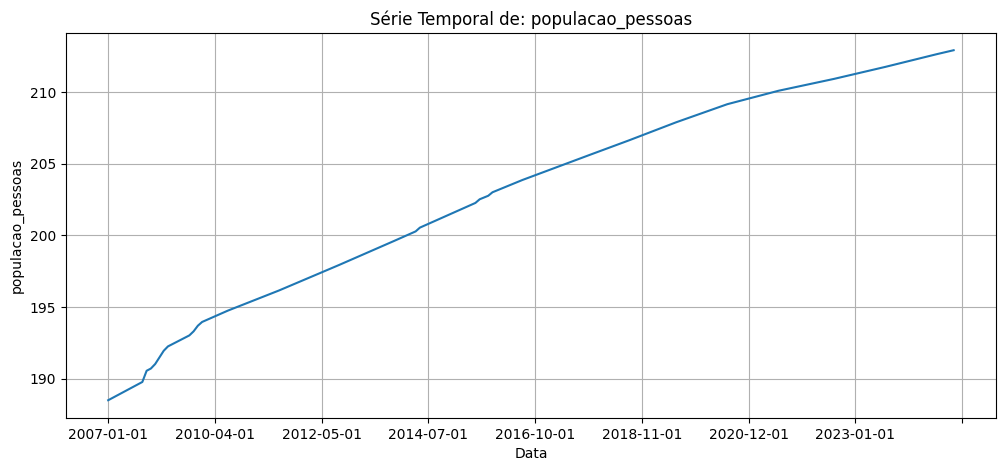

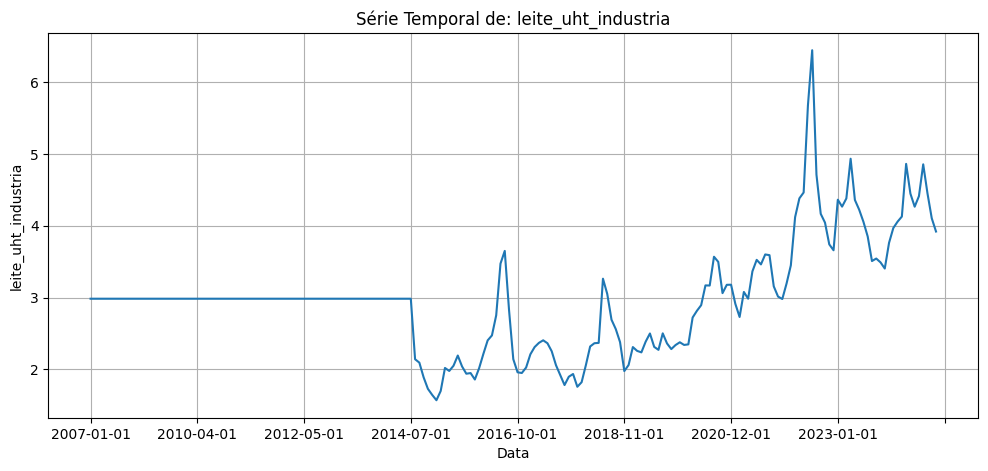

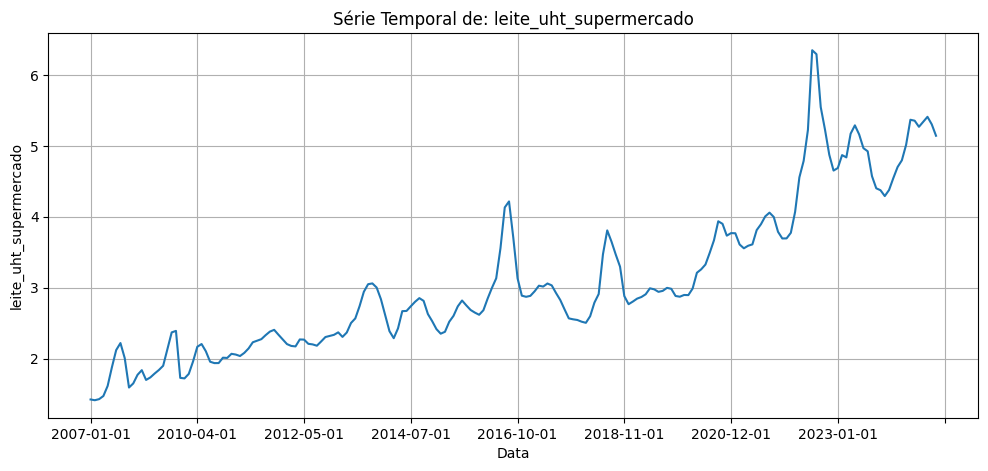

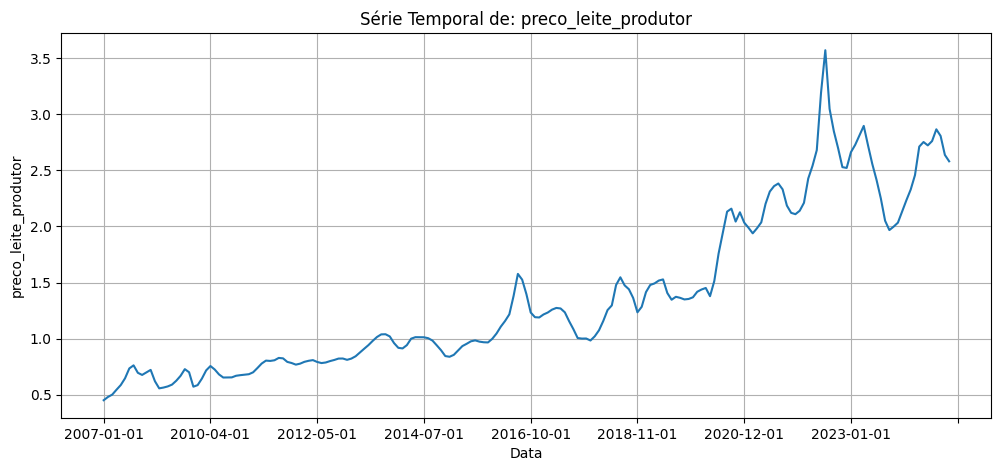

In [20]:
def plotar_serie(dados, colunas):
    for var in colunas:
        dados[var].plot(figsize=(12, 5), title=f'Série Temporal de: {var}')
        plt.xlabel("Data")
        plt.ylabel(var)
        plt.grid(True)
        plt.show()

plotar_serie(dados_selecionados, dados_selecionados.columns)

In [21]:
dados_selecionados

,populacao_pessoas,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor
data,,,,
2007-01-01,188.496928,2.983468,1.422492,0.450872
2007-02-01,188.657245,2.983468,1.412007,0.480057
2007-03-01,188.817561,2.983468,1.427207,0.500857
2007-04-01,188.977878,2.983468,1.471410,0.544433
2007-05-01,189.138194,2.983468,1.613760,0.586239
...,...,...,...,...
2024-08-01,212.653524,4.413439,5.269147,2.760700
2024-09-01,212.723298,4.856938,5.339753,2.865700
2024-10-01,212.793072,4.452080,5.410238,2.806500


### Teste de Dickey Fuller Aumentado (ADF)

Ele é um teste paramétrico, pois assume uma estrutura específica para o modelo da série temporal e testa a presença de raiz unitária com base em uma regressão linear com termos autorregressivos.

As hipóteses do Teste ADF são:

- Hipótese nula (H0): A série possui raiz unitária, ou seja, não é estacionária.
- Hipótese alternativa (H1): A série não possui raiz unitária, ou seja, é estacionária.

In [22]:
def testa_estacionaridade(serie):

    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')

    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()

    # Teste Dickey-Fuller
    print('\nResultado do Teste Dickey-Fuller:\n')


    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste', 'Valor-p', 'Número de Lags Consideradas', 'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    print(dfsaida)

    # Teste o valor-p
    print('\nConclusão:')
    if dfsaida.iloc[1] > 0.05:  # Usando .iloc para acessar pela posição
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')

    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')


Teste de Estacionaridade para a variável: preco_leite_produtor


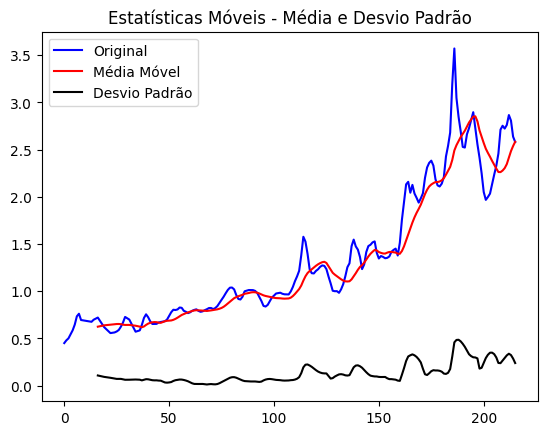


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.008494
Valor-p                           0.959229
Número de Lags Consideradas       7.000000
Número de Observações Usadas    191.000000
Valor Crítico (1%)               -3.465059
Valor Crítico (5%)               -2.876794
Valor Crítico (10%)              -2.574901
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


Teste de Estacionaridade para a variável: populacao_pessoas


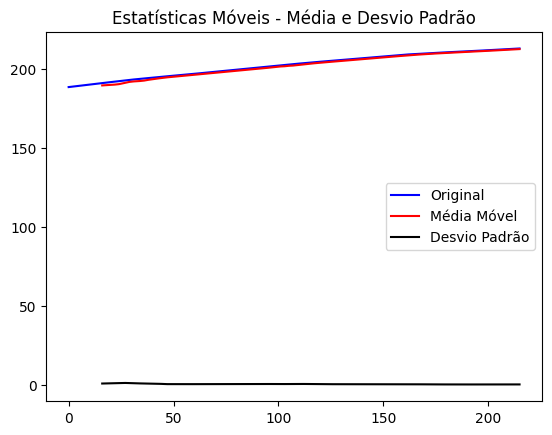


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -3.361056
Valor-p                           0.012360
Número de Lags Consideradas      15.000000
Número de Observações Usadas    183.000000
Valor Crítico (1%)               -3.466598
Valor Crítico (5%)               -2.877467
Valor Crítico (10%)              -2.575260
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


Teste de Estacionaridade para a variável: leite_uht_industria


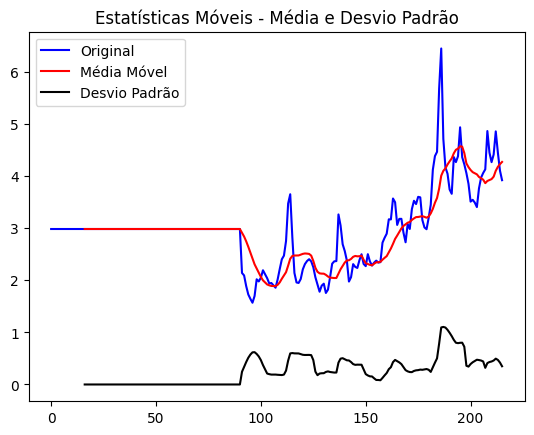


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -0.733425
Valor-p                           0.837901
Número de Lags Consideradas       8.000000
Número de Observações Usadas    190.000000
Valor Crítico (1%)               -3.465244
Valor Crítico (5%)               -2.876875
Valor Crítico (10%)              -2.574945
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


Teste de Estacionaridade para a variável: leite_uht_supermercado


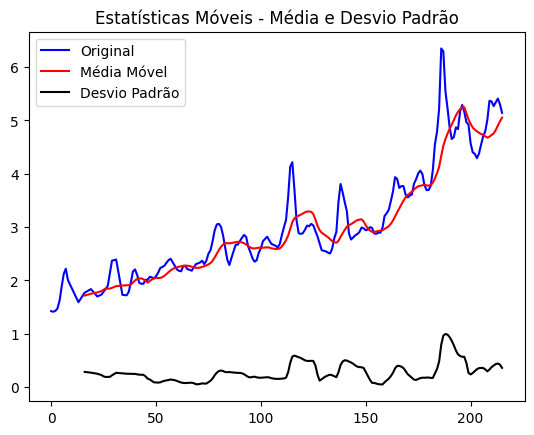


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -0.089447
Valor-p                           0.950480
Número de Lags Consideradas       7.000000
Número de Observações Usadas    191.000000
Valor Crítico (1%)               -3.465059
Valor Crítico (5%)               -2.876794
Valor Crítico (10%)              -2.574901
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.




In [23]:
# Variáveis para testar estacionaridade
variaveis = ['preco_leite_produtor', 'populacao_pessoas', 'leite_uht_industria', 'leite_uht_supermercado']

for var in variaveis:
    print(f"Teste de Estacionaridade para a variável: {var}")
    testa_estacionaridade(dados[var])
    print("\n" + "="*50 + "\n")

Com base nos resultados acima, somente a variável populacao_pessoas é estacionária. Agora será feito algumas transformações e rodar os testes novamente para verificar a estacionaridade.

### Aplicação da técnica de diferenciação.

É uma técnica utilizada para tornar uma série temporal estacionária, ou seja, remover a tendência ou a sazonalidade da série para facilitar a análise e a modelagem.

Ela funciona da seguinte maneira

- Primeira diferenciação
Esse processo elimina a tendência de longo prazo da série.

- Segunda diferenciação: Se a primeira diferenciação não for suficiente para tornar a série estacionária, pode-se aplicar uma segunda diferenciação.

In [24]:
variaveis_estac = ['preco_leite_produtor', 'leite_uht_industria', 'leite_uht_supermercado']

dados_selecionados.loc[:, 'populacao_pessoas'] = np.log(dados_selecionados['populacao_pessoas'])
dados_selecionados.loc[:, 'leite_uht_industria'] = np.log(dados_selecionados['leite_uht_industria'])
dados_selecionados.loc[:, 'leite_uht_supermercado'] = np.log(dados_selecionados['leite_uht_supermercado'])
dados_selecionados.loc[:, 'preco_leite_produtor'] = np.log(dados_selecionados['preco_leite_produtor'])

In [25]:
dados_selecionados['preco_leite_produtor'] = dados_selecionados['preco_leite_produtor'].diff()
dados_selecionados['leite_uht_industria'] = dados_selecionados['leite_uht_industria'].diff()
dados_selecionados['leite_uht_supermercado'] = dados_selecionados['leite_uht_supermercado'].diff()
dados_selecionados['populacao_pessoas'] = dados_selecionados['populacao_pessoas'].diff()


# Removendo a primeira linha com NaN
dados_selecionados = dados_selecionados.dropna(subset=['populacao_pessoas'])
dados_selecionados = dados_selecionados.dropna(subset=['preco_leite_produtor'])
dados_selecionados = dados_selecionados.dropna(subset=['leite_uht_industria'])
dados_selecionados = dados_selecionados.dropna(subset=['leite_uht_supermercado'])


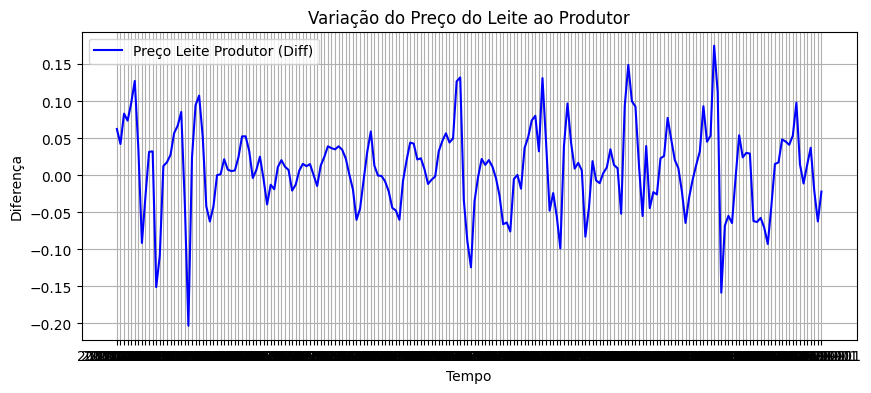

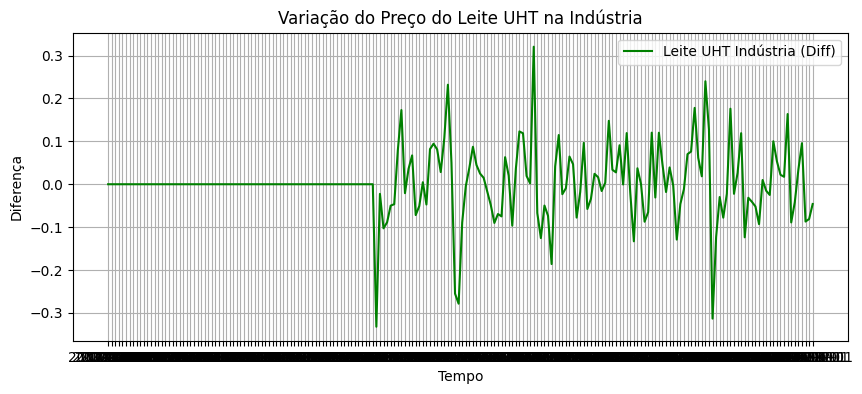

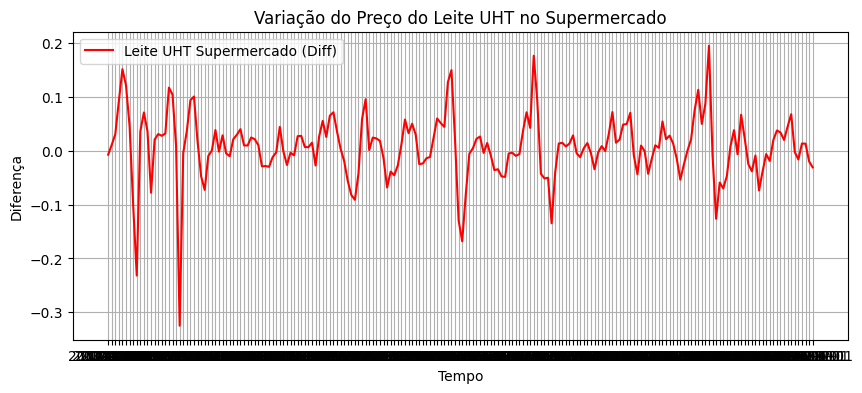

In [26]:
# Gráfico 1: Variação do preço do leite ao produtor
plt.figure(figsize=(10, 4))
plt.plot(dados_selecionados['preco_leite_produtor'], label='Preço Leite Produtor (Diff)', color='blue')
plt.title('Variação do Preço do Leite ao Produtor')
plt.xlabel('Tempo')
plt.ylabel('Diferença')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Variação do leite UHT na indústria
plt.figure(figsize=(10, 4))
plt.plot(dados_selecionados['leite_uht_industria'], label='Leite UHT Indústria (Diff)', color='green')
plt.title('Variação do Preço do Leite UHT na Indústria')
plt.xlabel('Tempo')
plt.ylabel('Diferença')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 3: Variação do leite UHT no supermercado
plt.figure(figsize=(10, 4))
plt.plot(dados_selecionados['leite_uht_supermercado'], label='Leite UHT Supermercado (Diff)', color='red')
plt.title('Variação do Preço do Leite UHT no Supermercado')
plt.xlabel('Tempo')
plt.ylabel('Diferença')
plt.legend()
plt.grid(True)
plt.show()

Teste de Estacionaridade para a variável: preco_leite_produtor


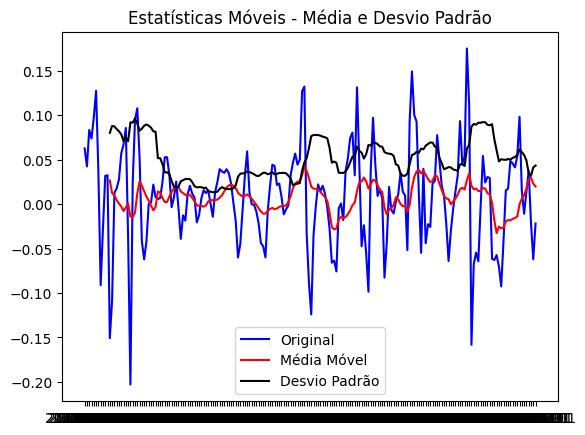


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -7.891440e+00
Valor-p                         4.425516e-12
Número de Lags Consideradas     3.000000e+00
Número de Observações Usadas    1.940000e+02
Valor Crítico (1%)             -3.464515e+00
Valor Crítico (5%)             -2.876556e+00
Valor Crítico (10%)            -2.574775e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


Teste de Estacionaridade para a variável: leite_uht_industria


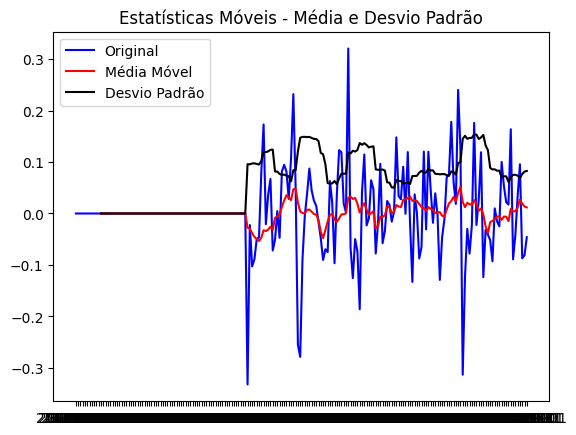


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -7.989435e+00
Valor-p                         2.497432e-12
Número de Lags Consideradas     6.000000e+00
Número de Observações Usadas    1.910000e+02
Valor Crítico (1%)             -3.465059e+00
Valor Crítico (5%)             -2.876794e+00
Valor Crítico (10%)            -2.574901e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


Teste de Estacionaridade para a variável: leite_uht_supermercado


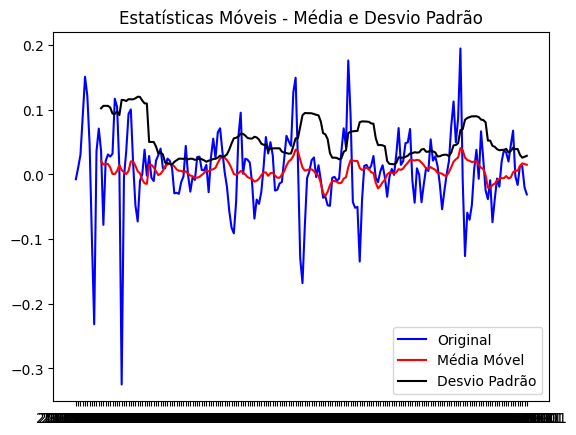


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -4.957546
Valor-p                           0.000027
Número de Lags Consideradas      15.000000
Número de Observações Usadas    182.000000
Valor Crítico (1%)               -3.466800
Valor Crítico (5%)               -2.877555
Valor Crítico (10%)              -2.575308
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.




In [27]:
variaveis_estac = ['preco_leite_produtor', 'leite_uht_industria', 'leite_uht_supermercado']

for var in variaveis_estac:
    print(f"Teste de Estacionaridade para a variável: {var}")
    testa_estacionaridade(dados_selecionados[var])
    print("\n" + "="*50 + "\n")

### Conclusão

Como as premissão estão concluídas, os dados estão prontos para a modelagem de séries temporais.

In [28]:
dados_selecionados.to_csv(r"C:\Users\eduar\OneDrive\Documentos\SandoBox\Projetos\PriceCast\Dataset\dados_preprocessados.csv")